In [26]:
import pandas as pd, numpy as np, scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
payment = pd.read_csv("../data/Repayments.csv", delimiter=';')
df = pd.read_csv("../data/Static.csv", delimiter=';')

In [16]:
df.head()

,CONTRACT_ID,CLIENT_ID,TERM,CONTRACT_SUM,GENDER,AGE,LOAN_TO_INCOME,PAYMENT_TO_INCOME,DOWNPAYMENT,CAR_CATEGORY,GRACE_PERIOD,RATE_CHANGE_AFTER_GRACE
0,17228104,251471,60,1185.75,M,32,10,0.22,0.4,2,6,13
1,17237409,251501,18,512.47,M,30,7,0.37,0.7,2,18,15
2,17276280,251669,60,1529.24,M,36,10,0.23,0.1,2,6,13
3,17282809,251684,60,906.53,M,27,6,0.15,0.3,1,6,13
4,17283247,251692,60,1593.50,F,50,18,0.42,0.1,2,6,13


In [17]:
payment.head()

,CONTRACT_ID,PERIOD_ID,REPAYMENT_SCHEDULED,REPAYMENT_ACTUAL
0,17228104,1,19.76,19.76
1,17228104,2,19.76,19.76
2,17228104,3,19.76,19.76
3,17228104,4,19.76,19.76
4,17228104,5,19.76,172.76


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3792 entries, 0 to 3791
Data columns (total 12 columns):
CONTRACT_ID                3792 non-null int64
CLIENT_ID                  3792 non-null int64
TERM                       3792 non-null int64
CONTRACT_SUM               3792 non-null float64
GENDER                     3792 non-null object
AGE                        3792 non-null int64
LOAN_TO_INCOME             3792 non-null int64
PAYMENT_TO_INCOME          3792 non-null float64
DOWNPAYMENT                3792 non-null float64
CAR_CATEGORY               3792 non-null int64
GRACE_PERIOD               3792 non-null int64
RATE_CHANGE_AFTER_GRACE    3792 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 355.6+ KB


In [20]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346258 entries, 0 to 346257
Data columns (total 4 columns):
CONTRACT_ID            346258 non-null int64
PERIOD_ID              346258 non-null int64
REPAYMENT_SCHEDULED    346258 non-null float64
REPAYMENT_ACTUAL       29249 non-null float64
dtypes: float64(2), int64(2)
memory usage: 10.6 MB


# clean data

In [19]:
df['GENDER'] = df['GENDER'].replace('M', 0).replace('F', 1)

# Exploratory Analysis

In [77]:
df.describe()

,CONTRACT_ID,CLIENT_ID,TERM,CONTRACT_SUM,AGE,LOAN_TO_INCOME,PAYMENT_TO_INCOME,DOWNPAYMENT,CAR_CATEGORY,GRACE_PERIOD,RATE_CHANGE_AFTER_GRACE
count,3.792000e+03,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000
mean,2.155112e+07,384711.909019,91.312764,1357.646089,41.523207,11.457278,0.241311,0.416746,2.086762,8.965454,7.209388
std,1.633545e+06,66170.799120,37.093859,703.577096,10.080394,5.468528,0.113860,0.209461,0.537797,6.546034,6.469940
min,1.722810e+07,4041.000000,10.000000,229.500000,20.000000,1.000000,0.020000,0.000000,1.000000,0.000000,0.000000
25%,2.057077e+07,397814.250000,84.000000,912.650000,34.000000,7.000000,0.160000,0.200000,2.000000,0.000000,0.000000
50%,2.188881e+07,407254.500000,120.000000,1277.550000,40.000000,11.000000,0.230000,0.500000,2.000000,12.000000,7.000000
75%,2.275136e+07,412069.250000,120.000000,1670.647500,49.000000,15.000000,0.310000,0.600000,2.000000,12.000000,14.000000
max,2.477025e+07,421315.000000,121.000000,8415.000000,69.000000,44.000000,1.670000,0.900000,5.000000,24.000000,15.000000


In [ ]:
g = sns.FacetGrid(mean_exp, row="Pclass", col="Sex", sharex=False)
g.map(sns.barplot, 'Family', 'Survival Rate')
plt.show()

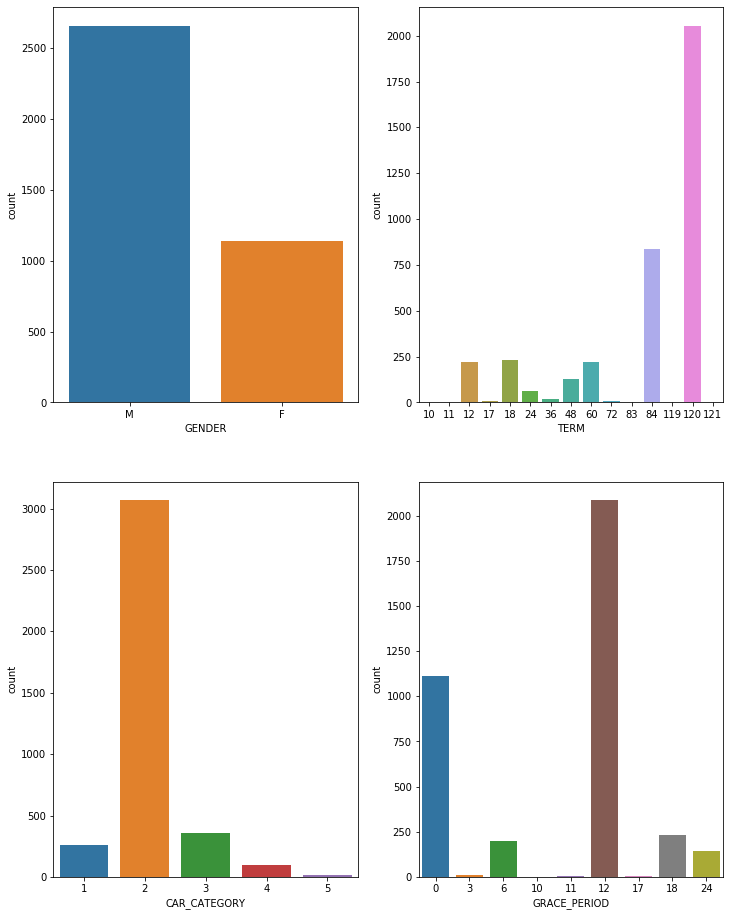

In [47]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 16));

sns.countplot(x='GENDER', data=df, ax=axes[0][0]);
sns.countplot(x='CAR_CATEGORY', data=df, ax=axes[1][0]);
sns.countplot(x='GRACE_PERIOD', data=df, ax=axes[1][1]);
sns.countplot(x='TERM', data=df, ax=axes[0][1]);

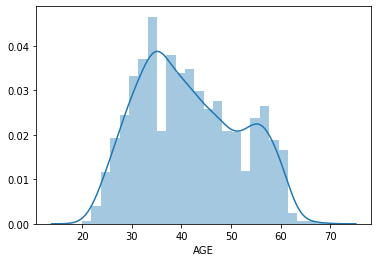

In [53]:
sns.distplot(df['AGE'])

2    3067
3     355
1     260
4      96
5      14
Name: CAR_CATEGORY, dtype: int64


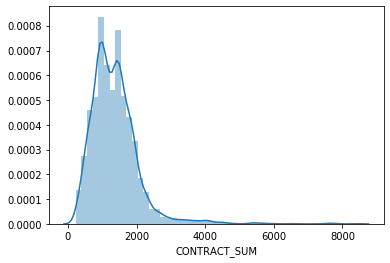

In [63]:
print(df['CAR_CATEGORY'].value_counts())
sns.distplot(df['CONTRACT_SUM'])

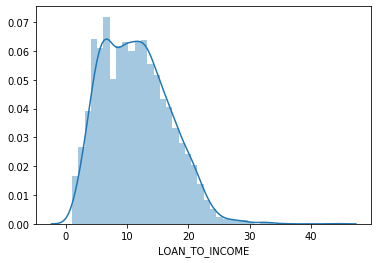

In [54]:
sns.distplot(df['LOAN_TO_INCOME'])

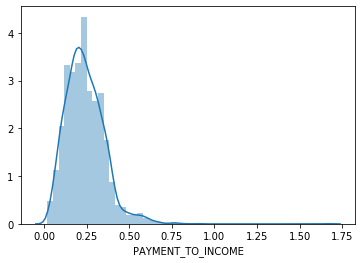

In [55]:
sns.distplot(df['PAYMENT_TO_INCOME'])

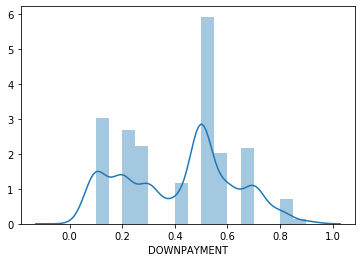

In [56]:
sns.distplot(df['DOWNPAYMENT'])

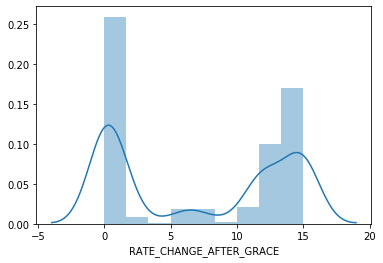

In [57]:
sns.distplot(df['RATE_CHANGE_AFTER_GRACE'])

In [73]:
df_cor = df.drop(['CONTRACT_ID', 'CLIENT_ID'], axis=1)

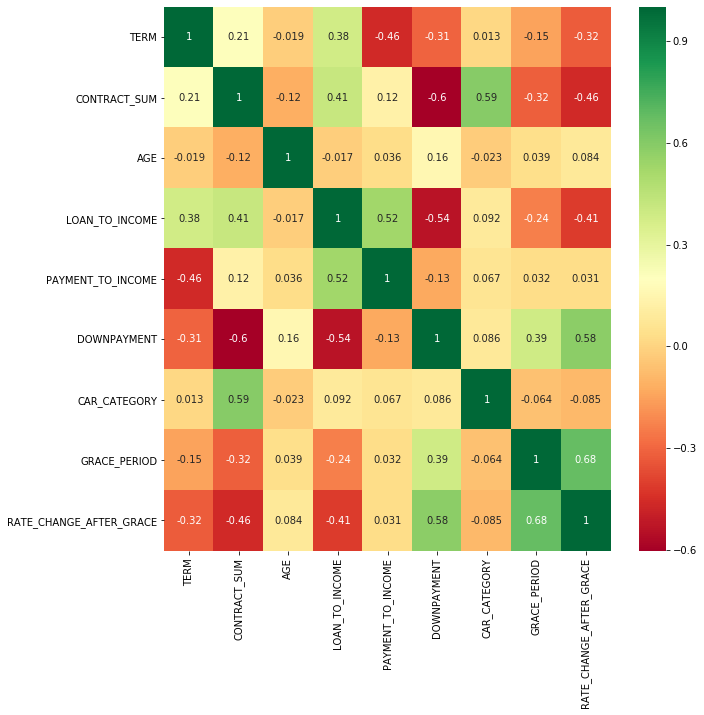

In [74]:
plt.figure(figsize=(len(df_cor.columns),len(df_cor.columns)))
ax=sns.heatmap(df_cor[df_cor.corr().index].corr(),annot=True,cmap="RdYlGn")
for lab, annot in zip(ax.get_yticklabels(), ax.texts):
    text =  lab.get_text()

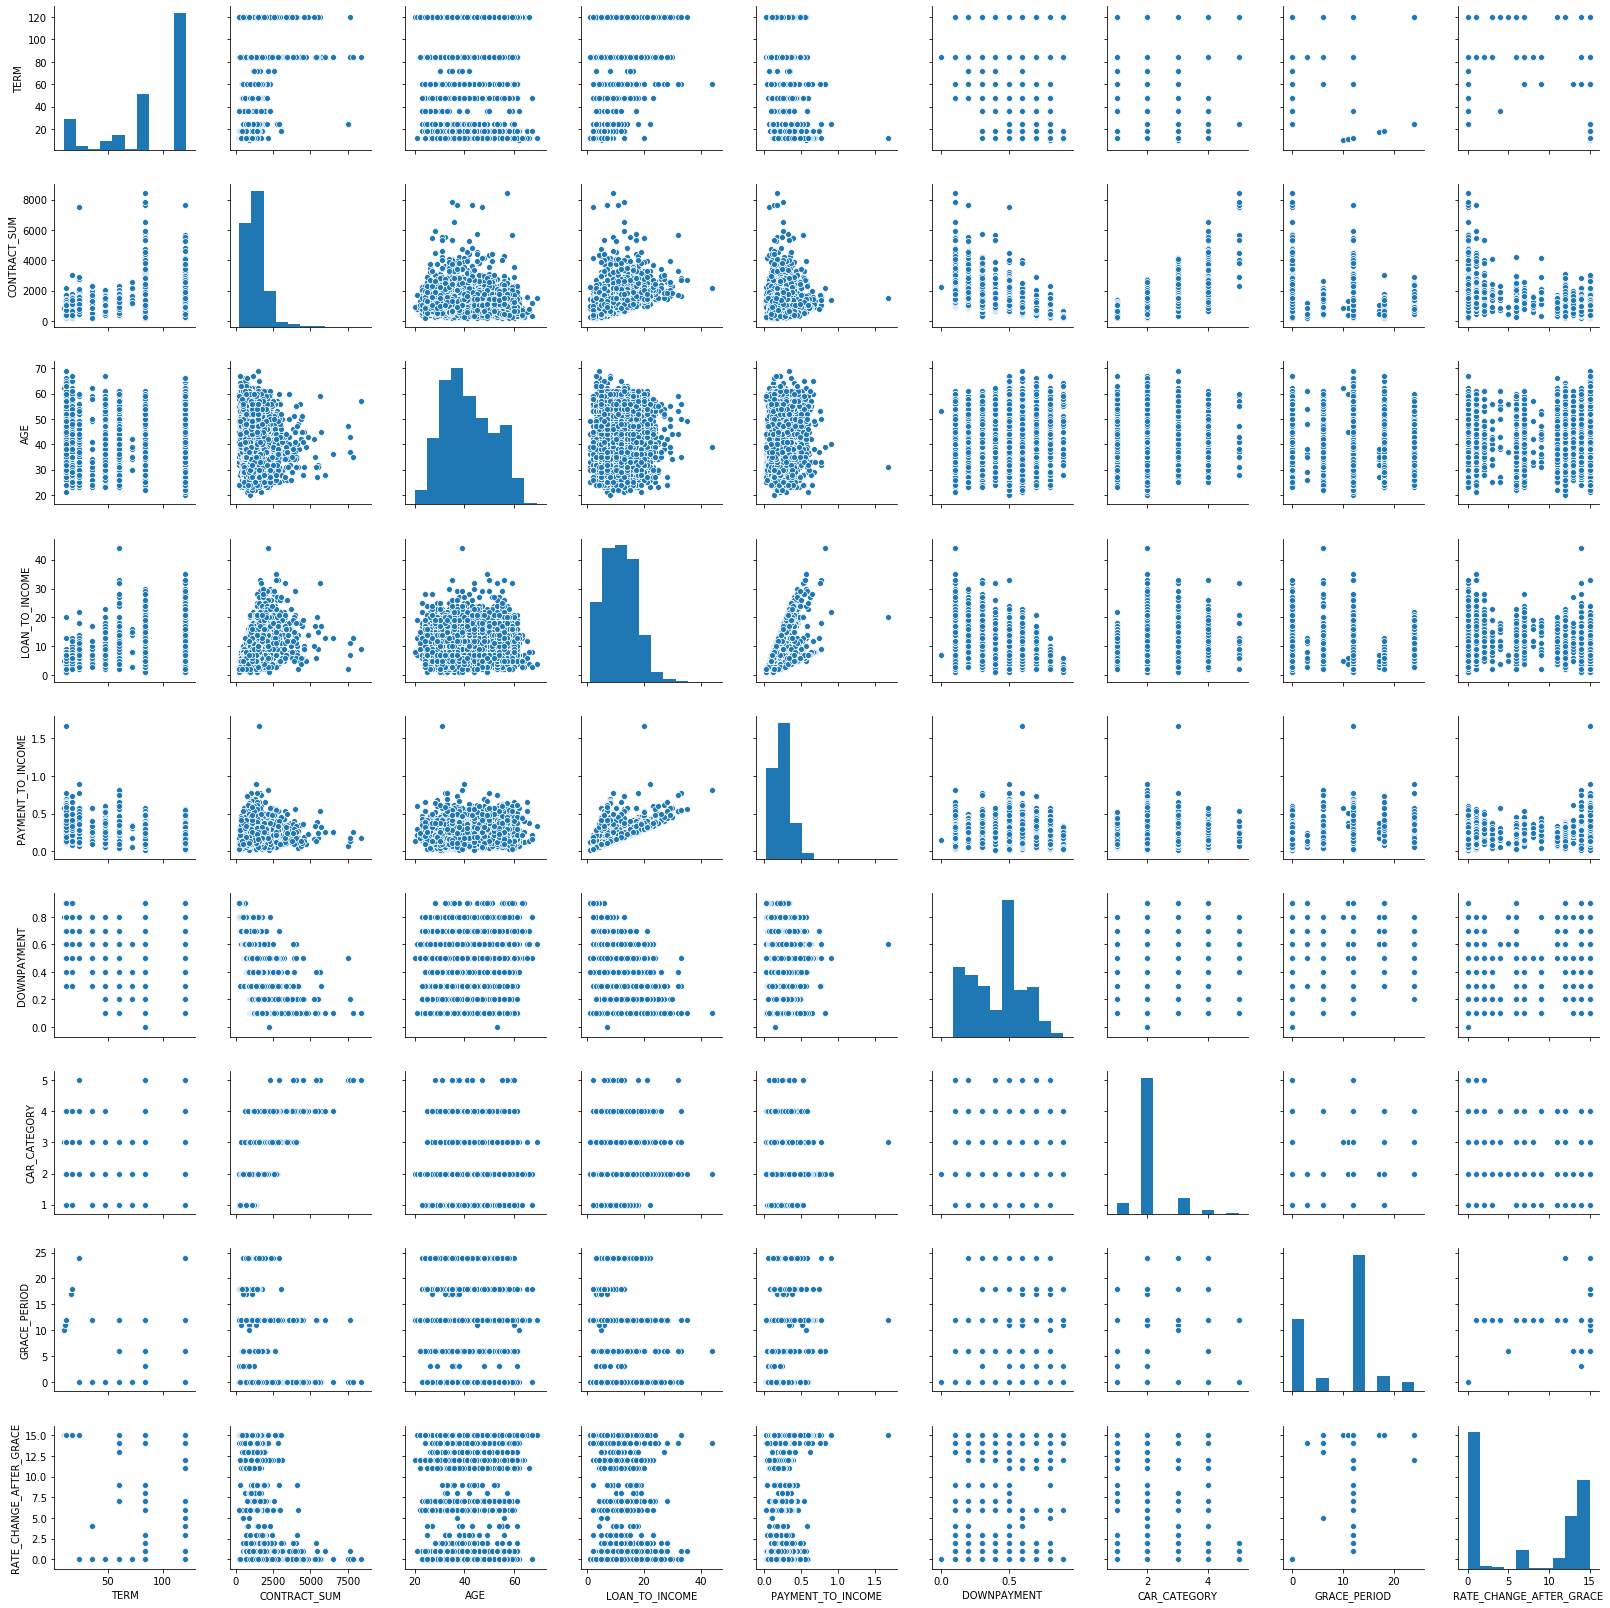

In [79]:
# pairplot may become very slow with the SVG format
#%config InlineBackend.figure_format = 'png' 
sns.pairplot(df_cor);